# Análise Exploratória Playlist Spotify



# Objetivos:

Descobrir:
- Artistas mais frequentes e lista de artistas
- Albums mais frequente
- Quantas músicas foram adicionadas em cada ano
- Décadas mais presentes
- gravadoras mais presentes


## Etapas:

1. Obtenção dos Dados
2. Limpeza dos Dados
3. Análise Exploratória

## 1. Obtenção dos dados

Os dados foram obtidos com o site skiley, cujo endereço é: https://skiley.net/ <br>
Basta fazer o login, procurar sua(s) playlists e clicar na opção "exportar" e salvar como CSV. 

In [1]:
#importar as bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#permitir visualizar todas as colunas
pd.options.display.max_columns = None

#permitir visualizar todas as linhas
pd.set_option('display.max_rows', None)

#renderizar os gráficos diretamente no notebook
#%matplotlib inline

In [2]:
# Carregar a playlist com o pandas e ignorar linhas com erro com o parâmetro error_bad_lines = False
playlist = pd.read_csv('daboa.csv', error_bad_lines=False)

b'Skipping line 202: expected 23 fields, saw 24\nSkipping line 203: expected 23 fields, saw 24\nSkipping line 204: expected 23 fields, saw 24\nSkipping line 205: expected 23 fields, saw 24\n'


## Dicionário dos Dados

- <b>trackName</b>: Nome da música.
- <b>artistName</b>: Nome do artista.
- <b>albumName</b>: Nome do Album.
- <b>trackDuration</b>: Duração da Música
- <b>trackNumber</b>: Número da música na playlist.
- <b>addedBy </b>: Pessoa que colocou a música na playlist.
- <b>addedAt </b>: Data que a música foi adicionada. 
- <b>isLocal</b>: Todos os valores dessa coluna são o mesmo: "stream".
- <b>trackPopularity</b>: Popularidade da música.
- <b>artistPopularity</b>: Popularidade do artista no spotify.
- <b>secondaryArtistsNames</b>: Artistas secundários (convidados, feat.)
- <b>albumPopularity</b>: Popularidade do Album.
- <b>artistFollowers</b>: Quantidade de seguidores do artista.
- <b>artistGenres</b>: Generos do Artista.
- <b>albumType</b>: Tipo de album (album, single, compilation).
- <b>albumRecordLabel</b>: Gravadora do album.
- <b>albumReleaseDate</b>: Ano do album.
- <b>albumArtistsNames</b>: Nome da banda.
- <b>trackUrl</b>: Link da música.
- <b>artistUrl</b>: Link do artista.
- <b>albumUrl </b>: Link do album. 
- <b>tackIsrc</b>:  Id da música (?).
- <b>albumUpc</b>: Id do álbum (?).

## 2. Limpeza dos Dados

In [3]:
# deixar só as colunas que me interessam
colunas = ['trackName', 'artistName', 'albumName', 'addedAt',  'artistPopularity',
           'albumPopularity', 'artistFollowers','artistGenres',  'albumRecordLabel', 'albumReleaseDate']

In [4]:
# filtras as colunas no dataset
playlist = playlist.filter(items = colunas)

In [5]:
# renomear colunas

playlist.columns = ['Música', 'Artista', 'Album', 'adicionadaData', 
                    'artistaPopularidade', 'albumPopularidade', 'seguidoresArtista', 'generos',
                   'gravadora', 'anoAlbum']

In [6]:
# descobrir tipo das variáveis
playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2649 entries, 0 to 2648
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Música               2649 non-null   object
 1   Artista              2649 non-null   object
 2   Album                2649 non-null   object
 3   adicionadaData       2649 non-null   object
 4   artistaPopularidade  2649 non-null   int64 
 5   albumPopularidade    2649 non-null   int64 
 6   seguidoresArtista    2649 non-null   int64 
 7   generos              2630 non-null   object
 8   gravadora            2649 non-null   object
 9   anoAlbum             2649 non-null   object
dtypes: int64(3), object(7)
memory usage: 207.1+ KB


In [7]:
# deixar só o ano na coluna adicionadaData
playlist['adicionadaData'] = playlist['adicionadaData'].str[:4]

In [8]:
# deixar só o ano na coluna anoAlbum
playlist['anoAlbum'] = playlist['anoAlbum'].str[:4]

In [9]:
# Visualização das 5 primeiras linhas do dataframe
playlist.head()

,Música,Artista,Album,adicionadaData,artistaPopularidade,albumPopularidade,seguidoresArtista,generos,gravadora,anoAlbum
0,Train,4 Non Blondes,"Bigger, Better, Faster, More !",2018,66,72,267996,"New Wave Pop, Pop Rock",Interscope,1992
1,Superfly,4 Non Blondes,"Bigger, Better, Faster, More !",2018,66,72,267996,"New Wave Pop, Pop Rock",Interscope,1992
2,What's Up?,4 Non Blondes,"Bigger, Better, Faster, More !",2018,66,72,267996,"New Wave Pop, Pop Rock",Interscope,1992
3,Morphine & Chocolate,4 Non Blondes,"Bigger, Better, Faster, More !",2018,66,72,267996,"New Wave Pop, Pop Rock",Interscope,1992
4,Calling All The People,4 Non Blondes,"Bigger, Better, Faster, More !",2018,66,72,267996,"New Wave Pop, Pop Rock",Interscope,1992


## 3. Análise Exploratória

In [10]:
playlist.describe()

,artistaPopularidade,albumPopularidade,seguidoresArtista
count,2649.000000,2649.000000,2.649000e+03
mean,68.996602,53.888637,3.766129e+06
std,13.885768,20.106891,4.690688e+06
min,1.000000,0.000000,5.270000e+02
25%,63.000000,45.000000,6.920240e+05
50%,72.000000,59.000000,2.050975e+06
75%,80.000000,68.000000,5.118269e+06
max,96.000000,95.000000,4.595744e+07


### Artistas mais frequentes

In [11]:
# achar quantos artistas a playlist possui
len(playlist['Artista'].unique().tolist())

252

In [12]:
# ver rapidamente os 5 mais presentes
playlist['Artista'].value_counts()

Engenheiros Do Hawaii                   105
Pearl Jam                                78
Alice In Chains                          72
System Of A Down                         64
Arctic Monkeys                           59
Charlie Brown Jr.                        56
Megadeth                                 52
The Beatles                              50
Iron Maiden                              44
Pink Floyd                               43
Angra                                    40
Zaz                                      40
Radiohead                                39
Nirvana                                  38
AC/DC                                    36
The Strokes                              35
Bauhaus                                  35
Zeca Baleiro                             32
Los Hermanos                             31
Pitty                                    30
O Rappa                                  29
Humberto Gessinger                       29
Led Zeppelin                    

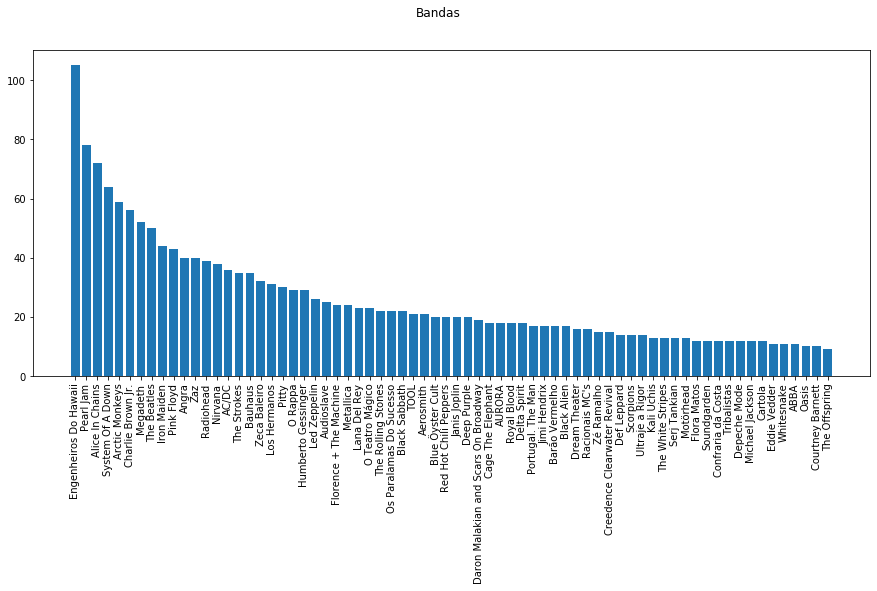

In [13]:
# plotar um gráfico para melhor visualização
names = list(playlist['Artista'].value_counts().keys())[:70]
values = list(playlist['Artista'].value_counts())[:70]

fig, axs = plt.subplots(figsize=(15,6))
axs.bar(names, values)
plt.xticks(rotation=90);
fig.suptitle('Bandas');

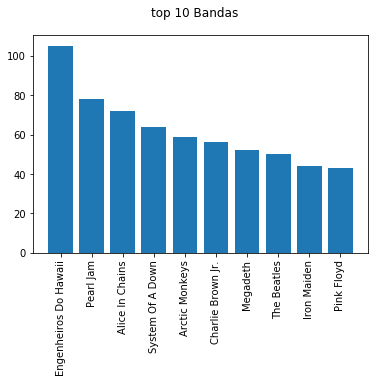

In [14]:
names = list(playlist['Artista'].value_counts().head(10).keys())
values = list(playlist['Artista'].value_counts().head(10))

fig, axs = plt.subplots()
axs.bar(names, values)
plt.xticks(rotation=90);
fig.suptitle('top 10 Bandas');

### Lista de Todas as Bandas

In [15]:
# fazer um dataframe com os 100 artistas mais frequentes
todasBandas = playlist.Artista.value_counts().to_frame()[:252]

In [16]:
# transformar o index em coluna
todasBandas.reset_index(level=0, inplace=True)

In [17]:
# renomear as colunas
todasBandas.columns = ['Artista', 'Quantidade de Músicas']

In [18]:
# visualizar a lista de todas as bandas
todasBandas[0:252]

,Artista,Quantidade de Músicas
0,Engenheiros Do Hawaii,105
1,Pearl Jam,78
2,Alice In Chains,72
3,System Of A Down,64
4,Arctic Monkeys,59
5,Charlie Brown Jr.,56
6,Megadeth,52
7,The Beatles,50
8,Iron Maiden,44
9,Pink Floyd,43


Com isso, tenho todos os artistas da minha playlist em forma de tabela. Assim, posso ver quais artistas são menos escutados e, assim, procurar mais albums deles para escutar.

### Albums mais frequentes

In [19]:
# achar quantos albums tem na playlist
len(playlist['Album'].unique().tolist())

496

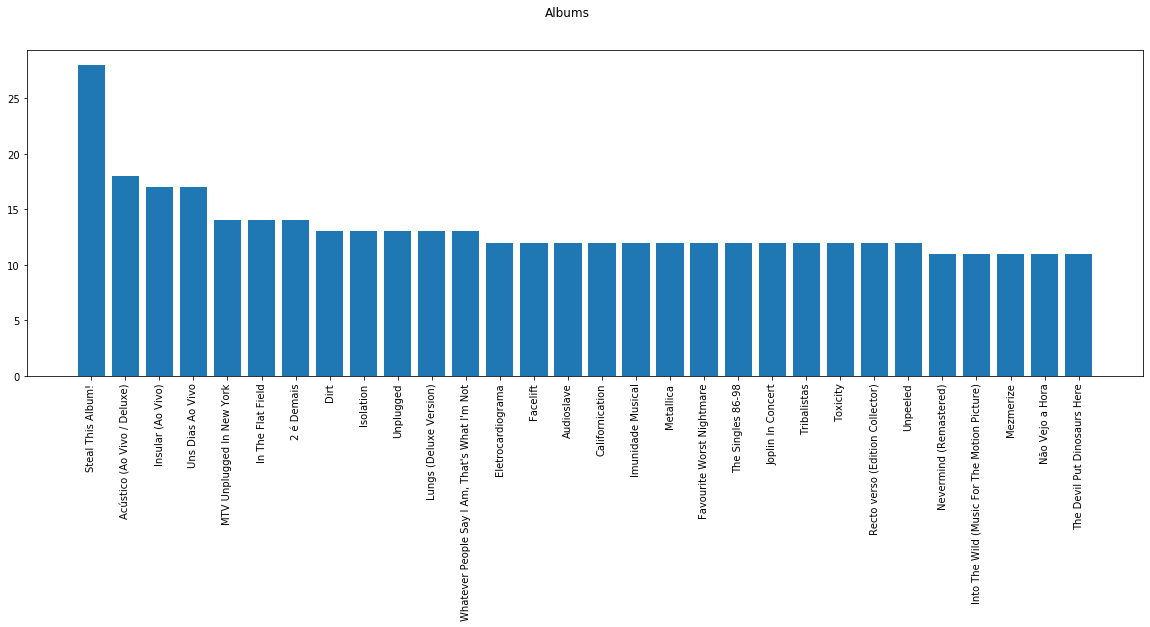

In [20]:
# plotar um gráfico com os albums que têm mais músicas na playlist, para melhor visualização
names = list(playlist['Album'].value_counts().keys())[:30]
values = list(playlist['Album'].value_counts())[:30]

fig, axs = plt.subplots(figsize=(20,6))
axs.bar(names, values)
plt.xticks(rotation=90);
fig.suptitle('Albums');

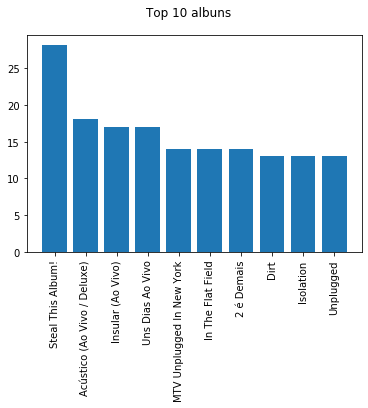

In [21]:
# grafico dos 10 albums com mais musicas na playlist
names = list(playlist['Album'].value_counts().head(10).keys())
values = list(playlist['Album'].value_counts().head(10))

fig, axs = plt.subplots()
axs.bar(names, values)
plt.xticks(rotation=90);
fig.suptitle('Top 10 albuns');

### Quantas músicas foram adicionadas em cada ano

In [22]:
# Quantas músicas foram adicionadas cada ano
playlist['adicionadaData'].value_counts()

2019    1711
2018     740
2020     198
Name: adicionadaData, dtype: int64

### Quais décadas mais ouvidas

In [23]:
# pegar os dados da coluna e transformar em inteiro
converte = playlist['anoAlbum']

pd.to_numeric(converte, errors='ignore')
pd.to_numeric(converte, errors='coerce')

0       1992
1       1992
2       1992
3       1992
4       1992
5       2013
6       2013
7       2013
8       2013
9       2013
10      2013
11      2013
12      2013
13      2013
14      2014
15      2014
16      2014
17      2014
18      2014
19      2014
20      2014
21      2014
22      2014
23      2014
24      2014
25      2014
26      2018
27      2018
28      2018
29      2018
30      2018
31      2018
32      2018
33      2018
34      2011
35      2011
36      2011
37      2011
38      2011
39      2011
40      2011
41      2011
42      2017
43      2017
44      2017
45      2017
46      2017
47      2017
48      2017
49      2017
50      2017
51      2017
52      2017
53      2017
54      2016
55      2016
56      2005
57      2005
58      2005
59      2005
60      2005
61      1970
62      1970
63      1970
64      1970
65      1971
66      1993
67      2009
68      1971
69      2017
70      2013
71      2009
72      2013
73      2011
74      2010
75      2010
76      2009

In [24]:
# converter series pandas para numpy array
converte_numpy = converte.to_numpy()
converte_numpy

array(['1992', '1992', '1992', ..., '2016', '2016', '2016'], dtype=object)

In [25]:
# converter numpy object array para numpy objetc float
data_numero= np.frompyfunc(lambda x: x.replace(',',''),1,1)(converte_numpy).astype(float)

In [26]:
# transformar anos em décadas
anos = data_numero

decades = []
for each in anos:
    decade = int(np.floor(each / 10) * 10)
    decades.append(decade)

print(set(decades)) 

{2020, 1990, 1960, 2000, 1970, 2010, 1980, 1950}


In [27]:
# importar Counter para conseguir contar a array numpy
from collections import Counter
Counter(decades)

Counter({1990: 548,
         2010: 661,
         2000: 619,
         1970: 295,
         1980: 301,
         1950: 7,
         1960: 204,
         2020: 14})

### Gravadoras mais presentes

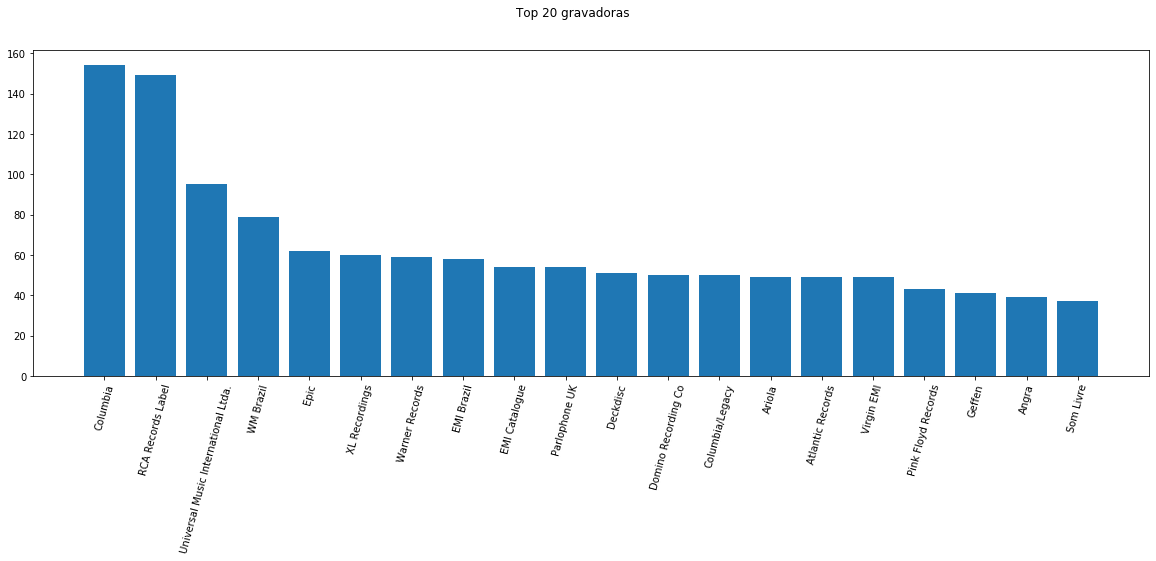

In [28]:
# plotar um gráfico com as gravadoras mais frequentes
names = list(playlist['gravadora'].value_counts().keys())[:20]
values = list(playlist['gravadora'].value_counts())[:20]

fig, axs = plt.subplots(figsize=(20,6))
axs.bar(names, values)
plt.xticks(rotation=75);
fig.suptitle('Top 20 gravadoras');

### Wordcloud

In [29]:
# instalar biblioteca wordcloud
!pip install wordcloud -q

In [30]:
all_summary = " ".join(s for s in playlist['Artista'])

print("Quantidade de Palavras: {}".format(len(all_summary)))

Quantidade de Palavras: 34710


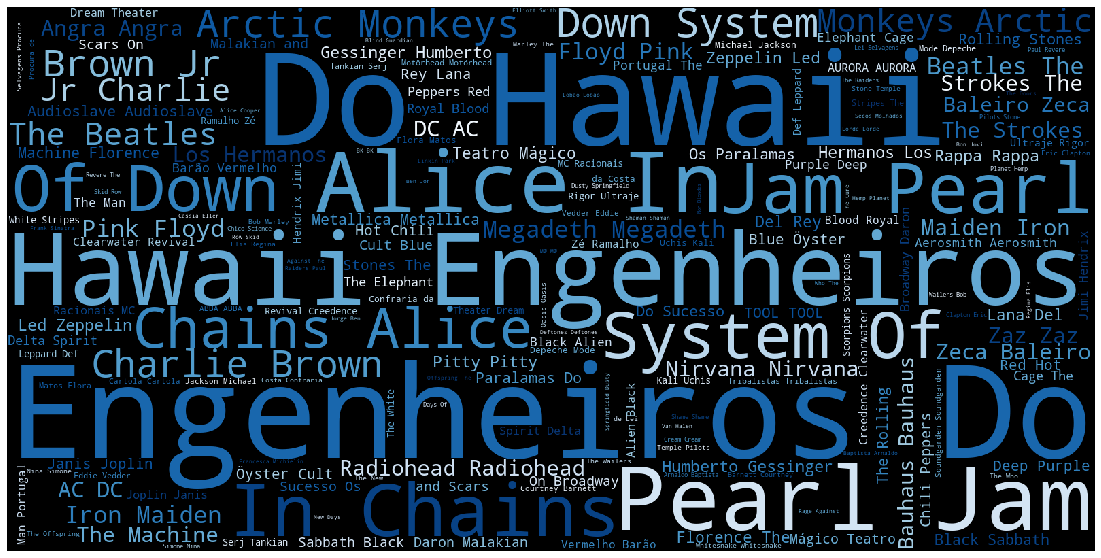

In [31]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# gerar uma wordcloud
wordcloud = WordCloud(background_color="black",
                      width=1600, height=800, colormap="Blues").generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("bandas_spotify_johnathan.png");